# Operation churn

### Imports

In [4]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import acquire
import prepare

### Acquire

Data was acquired from telco_churn database provided by Codeup  
Database consists of 7,043 rows and 24 columns  
No null values observed at this point  
Total charges dtype is object, will have to convert to float during prep  

In [5]:
df = acquire.get_telco_data()

Found CSV


In [6]:
df.shape

(7043, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [8]:
df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


### Prepare

Utilized function to drop duplicate columns:  
payment_type_id  
internet_service_type_id  
contract_type_id  

Converted total_charges to float
Discovered Null (blank space) values in total charges.  
Replaced null with 0:
Since new customers have not been charged, the amount is 0  

In [9]:
df = prepare.prep_telco(df)

In [10]:
df.shape

(7043, 48)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [12]:
df.total_charges.value_counts()

0.00       11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6531, dtype: int64

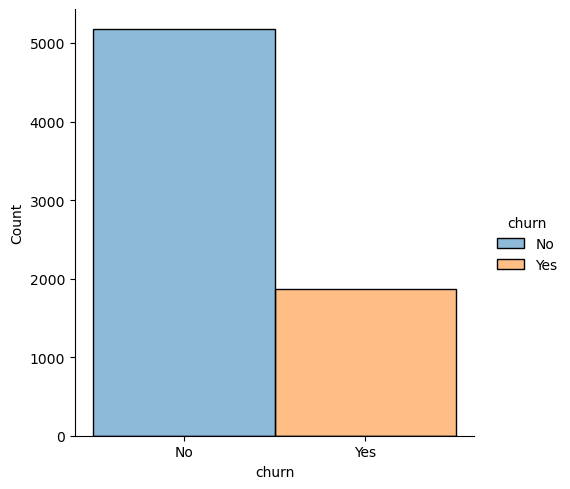

In [166]:
sns.displot(data=df, x='churn', hue='churn')
plt.show()

### EDA Process
Exploratory Data Analysis

**Before** exploring, I will **split my data** set into *train, validate, test* and **ONLY** use *train* for exploration.  
I used a function imported from prepare.py file  

In [13]:
train, validate, test = prepare.split_function(df, 'churn')

In [14]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (4225, 48)
Validate: (1409, 48)
Test: (1409, 48)


In [15]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,...,0,1,0,1,0,0,0,0,0,0
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,...,0,0,0,1,0,0,1,0,1,0
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,...,0,1,1,0,0,0,0,0,0,1
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,...,1,1,0,0,1,0,0,0,0,0
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,...,1,0,0,1,0,1,0,1,0,0


#### Question 1

**Do monthly charges effect customer churn?**

Monthly charges = Continuous  
Churn           = Categorical  

1 sample 1 tail ttest

$H_0$: Mean of monthly charges of churned customers <= Mean of monthly charges of all customers  
$H_a$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers  

In [16]:
alpha = 0.05

In [17]:
# displaying amount of customers who have and have not churned
train.churn.value_counts()

No     3104
Yes    1121
Name: churn, dtype: int64

In [19]:
no_churn = train[train.churn == 'No']

In [20]:
# isolating churned customers for ttest
churned = train[train.churn == 'Yes']

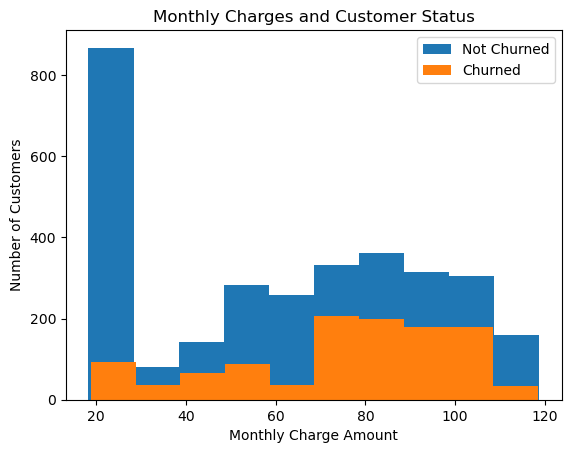

In [172]:
# showing distribution of customers who have churned based on monthly charges
plt.title('Monthly Charges and Customer Status')
plt.hist(no_churn.monthly_charges, label='Not Churned')
plt.hist(churned.monthly_charges, label='Churned')
plt.xlabel('Monthly Charge Amount')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

In [22]:
# calculating mean monthly charges for ttest
overall_mean = train.monthly_charges.mean()

In [23]:
# initiating ttest
t, p = stats.ttest_1samp(churned.monthly_charges, overall_mean)

print(t, p/2, alpha)

12.65294490503547 1.0740986591134452e-34 0.05


In [24]:
# printing test outcome results
if p/2 > alpha:
    print('We fail to reject the hypothesis')
elif t < 0:
    print('We fail to reject the hypothesis')
else:
    print('We reject the hypothesis')

We reject the hypothesis


**Takeaway:**  
Based on our 1 sample t-test, we can infer that monthly charges of churned customers are higher than the mean of all customers.

#### Question 2

**Does internet service type effect customer churn?**  
Internet service type = categorical  
Churn = categorical  

$Chi^2$ test

$H_0$: Customer Churn is independent of Internet service type  
$H_a$: Customer Churn is dependent on Internet service

In [25]:
train.internet_service_type.value_counts()

Fiber optic    1855
DSL            1447
None            923
Name: internet_service_type, dtype: int64

In [149]:
observed = pd.crosstab(train.internet_service_type, train.churn)
observed

churn,No,Yes
internet_service_type,,
DSL,1173,274
Fiber optic,1082,773
None,849,74


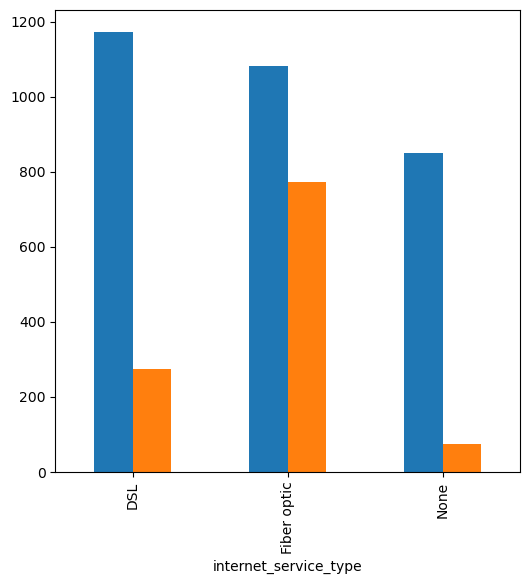

In [151]:
observed.plot.bar(subplots=False, figsize=(6, 6), legend=False)
plt.show()

<AxesSubplot:>

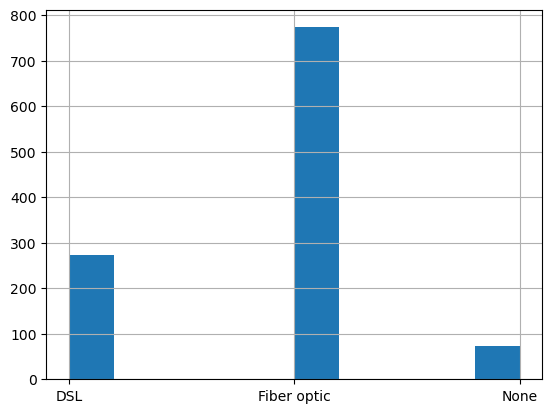

In [28]:
churned.internet_service_type.hist()

<AxesSubplot:>

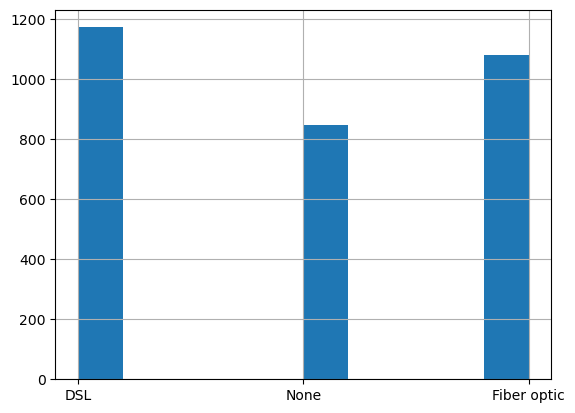

In [29]:
no_churn.internet_service_type.hist()

In [30]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [31]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed dataframe'
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by a new line
print('---\nExpected Values\n')

# print the expected values
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits
print(f'chi^2 = {chi2:.4f}')

# print the p-value, formatted to a float with 4 digits
print(f'p.    = {p:.4f}')

Observed Values

[[1173  274]
 [1082  773]
 [ 849   74]]
---
Expected Values

[[1063  383]
 [1362  492]
 [ 678  244]]
---

chi^2 = 423.2590
p.    = 0.0000


In [32]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis


**Takeaway:**  
Internet service type does effect customer churn

#### Question 3

**Does tenure effect customer churn?**  
Tenure = Continuous  
Churn = Categorical

$H_0$: Mean tenure of churned customers == Mean tenure of active customers  
$H_a$: Mean tenure of churned customers != Mean tenure of active customers  

In [33]:
train.churn.value_counts()

No     3104
Yes    1121
Name: churn, dtype: int64

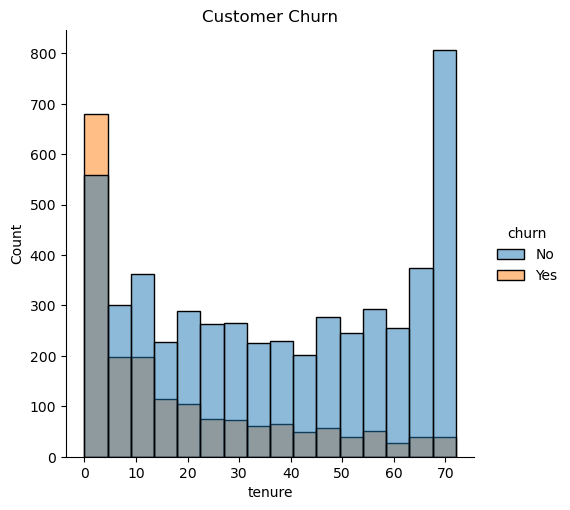

In [173]:
sns.displot(data=df, x='tenure', hue='churn')
plt.title('Customer Churn')
plt.show()

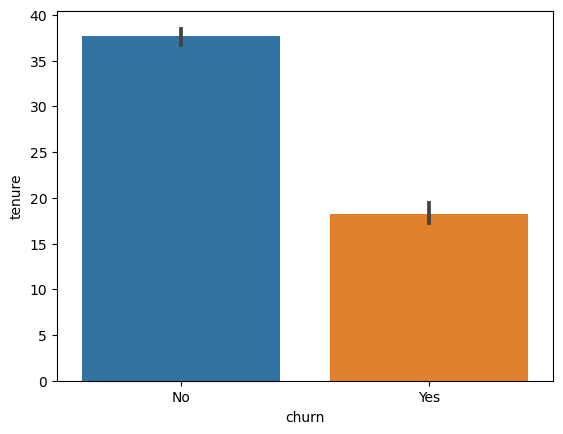

In [34]:
sns.barplot(data=train, x='churn', y='tenure')
plt.show()

In [35]:
# isolating churned customers for ttest
churned = train[train.churn == 'Yes']
churned.shape

(1121, 48)

In [36]:
alpha = 0.05

In [37]:
no_churn.shape

(3104, 48)

In [38]:
churned.tenure.mean()

18.28278322925959

In [39]:
no_churn.tenure.mean()

37.63563144329897

In [40]:
churned.tenure.var(), no_churn.tenure.var()

(384.3762122467161, 581.1295195495867)

In [41]:
stat, pval = stats.levene(churned.tenure, no_churn.tenure)
stat, pval

(239.792666591809, 1.1927270969927419e-52)

In [42]:
t, p = stats.ttest_ind(churned.tenure, no_churn.tenure, equal_var=False)
t, p 

(-26.580512011299394, 8.804788934588686e-137)

In [43]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis


**Takeaway:**  
We can infer that the mean tenure of active customers is higher than the mean tenure of customers who churn.  
Lifetime value of churned customers is half that of active customers

#### Question 4

**Does contract type effect customer churn?**  
Contract type == categorical  
churn == categorical

$Chi^2$ test  

$H_0$: Customer Churn is independent of contract type  
$H_a$: Customer Churn is dependent on contract type

In [44]:
train.contract_type.value_counts()

Month-to-month    2317
Two year           995
One year           913
Name: contract_type, dtype: int64

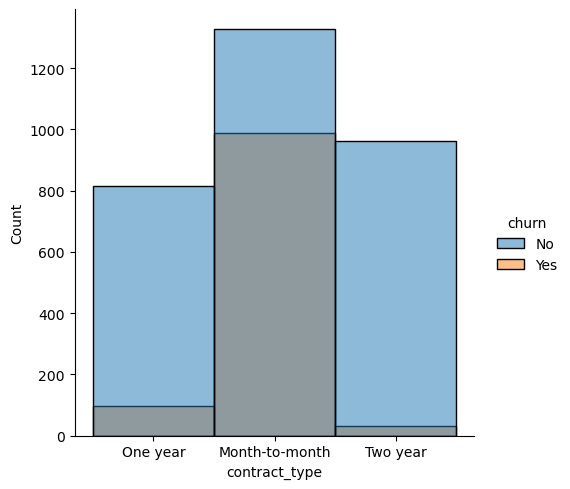

In [45]:
sns.displot(data=train, x='contract_type', hue='churn')
plt.show()

In [46]:
alpha = 0.05

In [47]:
observed = pd.crosstab(train.contract_type, train.churn)
observed

churn,No,Yes
contract_type,,
Month-to-month,1327,990
One year,815,98
Two year,962,33


In [48]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [49]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed dataframe'
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by a new line
print('---\nExpected Values\n')

# print the expected values
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits
print(f'chi^2 = {chi2:.4f}')

# print the p-value, formatted to a float with 4 digits
print(f'p.    = {p:.4f}')

Observed Values

[[1327  990]
 [ 815   98]
 [ 962   33]]
---
Expected Values

[[1702  614]
 [ 670  242]
 [ 731  263]]
---

chi^2 = 703.7871
p.    = 0.0000


In [50]:
if p > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

We reject the null hypothesis


In [51]:
train[train.churn == 'Yes'].contract_type.value_counts()

Month-to-month    990
One year           98
Two year           33
Name: contract_type, dtype: int64

In [52]:
990 / (990+98+33)

0.8831400535236396

**Takeaway:**  
Contract type does play a role in customer churn.  
Month-to-month is the bulk of all contracts.  
Month-to-month is 88% of contracts for customers who churn.  

### EDA Summary

**I answered 4 primary questions during the EDA phase of this project:**  

1. ***Does monthly charges effect customer churn?***  
2. ***Does internet service type effect customer churn?***  
3. ***Does tenure effect customer churn?***  
4. ***Does contract type effect customer churn?***  

The outcome for all 4 questions is **Yes**.  
I will be using all 4 features in the modeling phase.  
I was not surprised by the outcomes, I expected all 4 to play a role in customer churn. I wanted to test each to verify.  

### Modeling

#### Introduction  

I will use 2 ML algorithms:  
***Random Forests*** & ***Logistic Regression***  
Once multiple iterations are ran for both models, I will pick the top 3 and display them for the project deliverable.  

#### Random Forest

Features used for the first Model:  
tenure  ---------------->  'tenure'  
tech support  ---------->  'tech_support_No internet service' , 'tech_support_Yes'  
monthly charges  ------>  'monthly_charges'  
contract type  --------->  'contract_type_One year' , 'contract_type_Two year'  
internet service type  -->  'internet_service_type_Fiber optic' , 'internet_service_type_None'  

In [54]:
#Calculate baseline accuracy
baseline_accuracy = train[target_variable].value_counts().max() / train[target_variable].value_counts().sum()
print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 73.47%


In [81]:
# create variable for columns I want to drop for model
drop_cols = ['senior_citizen', 'total_charges', 'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes'
            , 'multiple_lines_No phone service', 'multiple_lines_Yes', 'online_security_No internet service'
            , 'online_security_Yes', 'online_backup_No internet service', 'online_backup_Yes'
            , 'device_protection_No internet service', 'device_protection_Yes', 'streaming_tv_No internet service'
            , 'streaming_tv_Yes', 'streaming_movies_No internet service', 'streaming_movies_Yes'
            , 'paperless_billing_Yes', 'payment_type_Credit card (automatic)'
            , 'payment_type_Electronic check', 'payment_type_Mailed check']

In [82]:
# create function to initiate X_y train, validate, test
def xy_train_val(train, validate, test, target_variable, drop_cols):
    """
    input train, validate, test, after using split function()
    input target_variable as string
    drop_cols formatted as: ['col1', 'col2', 'etc'] for multiple columns
        This function will drop all 'object' columns. Identify additional 
        columns you want to drop and insert 1 column as a string or multiple
        columns in a list of strings.
    X_train, X_validate, X_test, y_train, y_validate, y_test
    """
    
    baseline_accuracy = train[target_variable].value_counts().max() / train[target_variable].value_counts().sum()
    print(f'Baseline Accuracy: {baseline_accuracy:.2%}')
    
    X_train = train.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_validate = validate.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_test = test.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    
    y_train = train[target_variable]
    y_validate = validate[target_variable]
    y_test = test[target_variable]
    
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [83]:
# utilize function and save variables for first model
X_train, X_validate, X_test, y_train, y_validate, y_test = xy_train_val(train, validate, test, 'churn_Yes', drop_cols)

Baseline Accuracy: 73.47%


In [85]:
# verify columns needed stayed and columns dropped appropriately
X_train.head()

,tenure,monthly_charges,tech_support_No internet service,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None
5911,26,39.95,0,0,1,0,0,0
2479,47,26.90,1,0,1,0,0,1
5889,1,50.45,0,0,0,0,0,0
6087,69,60.05,0,1,0,1,0,0
785,51,87.55,0,0,1,0,1,0


In [84]:
# verify target variable saved as array
y_train.head()

5911    0
2479    0
5889    1
6087    0
785     0
Name: churn_Yes, dtype: uint8

In [89]:
# first iteration
rf = RandomForestClassifier(random_state=123, min_samples_leaf=1, max_depth=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)


TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
all_ = (TP + TN + FP + FN)
accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy:.2%}\n")

Accuracy: 85.25%



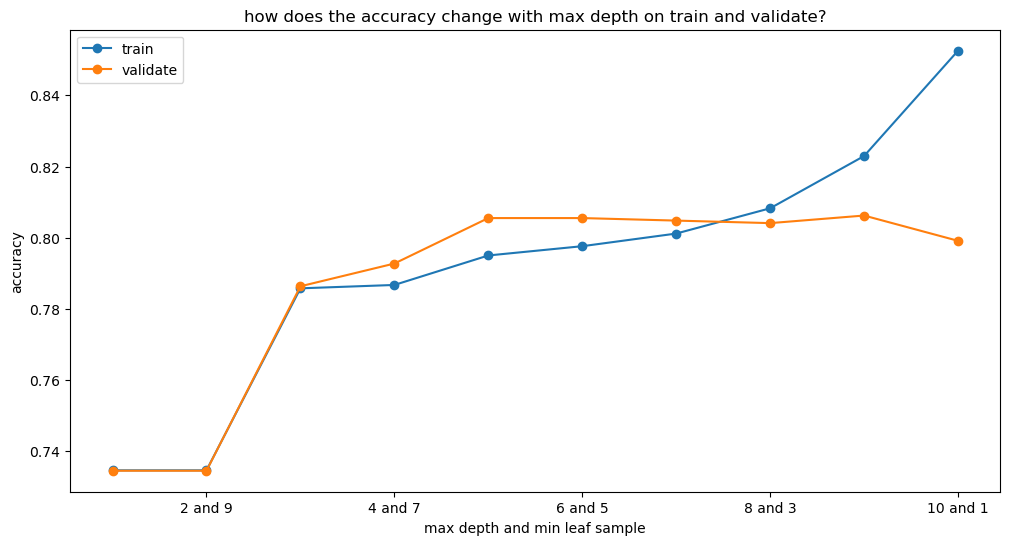

,min_samples_leaf,max_depth,train_acc,val_acc,difference
0,1,10,0.852544,0.799148,0.053396
1,2,9,0.822959,0.806246,0.016713
2,3,8,0.808284,0.804116,0.004168
3,4,7,0.801183,0.804826,-0.003643
4,5,6,0.797633,0.805536,-0.007903
5,6,5,0.795030,0.805536,-0.010506
6,7,4,0.786746,0.792761,-0.006015
7,8,3,0.785799,0.786373,-0.000574
8,9,2,0.734675,0.734564,0.000111
9,10,1,0.734675,0.734564,0.000111


In [87]:
# run loop to find best model accuracy
scores_all = []
for x in range(1,11):
    rf = RandomForestClassifier(random_state=123, min_samples_leaf=x, max_depth=11-x)
    rf.fit(X_train, y_train)
    train_acc = rf.score(X_train, y_train)
    val_acc = rf.score(X_validate, y_validate)
    scores_all.append([x, 11-x, train_acc, val_acc])


scores_df = pd.DataFrame(scores_all, columns=['min_samples_leaf', 'max_depth', 'train_acc', 'val_acc'])
scores_df['difference'] = scores_df.train_acc - scores_df.val_acc



plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='validate', marker='o')
plt.xlabel('max depth and min leaf sample')
plt.ylabel('accuracy')

plt.xticks([2,4,6,8,10],
          [('2 and 9'),('4 and 7'),('6 and 5'),('8 and 3'),('10 and 1')]
          )

plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()
scores_df

In [92]:
for importance, name in sorted(zip(rf.feature_importances_, X_train.columns),reverse=True):
    print (name, importance)

tenure 0.3585411124515877
monthly_charges 0.19965702780668873
internet_service_type_Fiber optic 0.12019996759127581
contract_type_Two year 0.11187900925819831
contract_type_One year 0.08286496873279385
tech_support_Yes 0.04758159054448598
internet_service_type_None 0.042574097883096726
tech_support_No internet service 0.036702225731872866


**Best Model for Random Forest**

In [90]:
# first iteration
rf = RandomForestClassifier(random_state=123, min_samples_leaf=3, max_depth=8)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)


TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
all_ = (TP + TN + FP + FN)
accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy:.2%}\n")

Accuracy: 80.83%



In [146]:
rf.score(X_validate, y_validate)

0.8041163946061036

#### Decision Tree

In [91]:
#Calculate baseline accuracy
baseline_accuracy = train[target_variable].value_counts().max() / train[target_variable].value_counts().sum()
print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 73.47%


In [93]:
# first iteration
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
all_ = (TP + TN + FP + FN)
accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy:.2%}\n")

Accuracy: 98.56%



First iteration appears to overfit with high accuracy

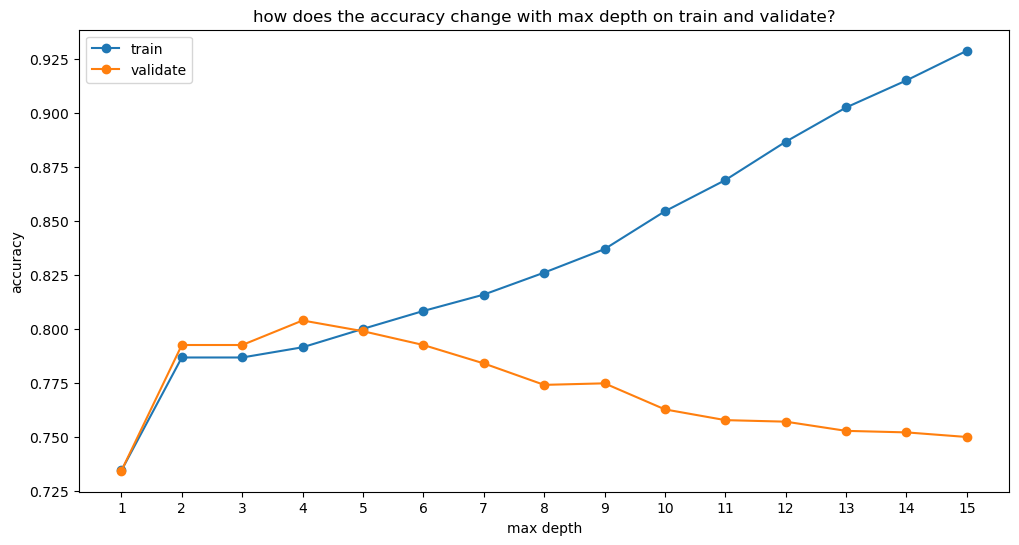

,max_depth,train_acc,val_acc,difference
0,1,0.734675,0.734564,0.000111
1,2,0.786982,0.792761,-0.005779
2,3,0.786982,0.792761,-0.005779
3,4,0.791716,0.804116,-0.012400
4,5,0.800237,0.799148,0.001088
5,6,0.808521,0.792761,0.015760
6,7,0.816095,0.784244,0.031851
7,8,0.826272,0.774308,0.051964
8,9,0.837160,0.775018,0.062142
9,10,0.854675,0.762952,0.091722


In [98]:
# run loop to find best model accuracy
scores_all = []
for x in range(1,16):
    clf = DecisionTreeClassifier(max_depth=x)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    val_acc = clf.score(X_validate, y_validate)
    scores_all.append([x, train_acc, val_acc])


scores_df = pd.DataFrame(scores_all, columns=['max_depth', 'train_acc', 'val_acc'])
scores_df['difference'] = scores_df.train_acc - scores_df.val_acc



plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='validate', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()
scores_df

In [100]:
for importance, name in sorted(zip(clf.feature_importances_, X_train.columns),reverse=True):
    print (name, importance)

tenure 0.5200224068566701
internet_service_type_Fiber optic 0.34126665515825594
contract_type_One year 0.03873574180364324
monthly_charges 0.026168627885213496
tech_support_No internet service 0.021402387737185984
internet_service_type_None 0.01856751799159292
contract_type_Two year 0.01856614294696628
tech_support_Yes 0.015270519620472007


**Best Model for Decision Tree**

In [144]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
all_ = (TP + TN + FP + FN)
accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy:.2%}\n")

Accuracy: 80.02%



In [145]:
clf.score(X_validate, y_validate)

0.7991483321504613

#### Logistic Regression

In [101]:
#Calculate baseline accuracy
baseline_accuracy = train[target_variable].value_counts().max() / train[target_variable].value_counts().sum()
print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 73.47%


**Best Model for Logistic Regression**

In [102]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)

TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
all_ = (TP + TN + FP + FN)
accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy:.2%}\n")

Accuracy: 78.51%



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [143]:
logit.score(X_validate, y_validate)

0.7977288857345636

In [105]:
X_train.head()

,tenure,monthly_charges,tech_support_No internet service,tech_support_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None
5911,26,39.95,0,0,1,0,0,0
2479,47,26.90,1,0,1,0,0,1
5889,1,50.45,0,0,0,0,0,0
6087,69,60.05,0,1,0,1,0,0
785,51,87.55,0,0,1,0,1,0


In [106]:
features = ['tenure', 'monthly_charges', 'contract_type_One year', 'contract_type_Two year'
            , 'internet_service_type_Fiber optic', 'internet_service_type_None']

In [108]:
X_train[features].head()

,tenure,monthly_charges,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None
5911,26,39.95,1,0,0,0
2479,47,26.90,1,0,0,1
5889,1,50.45,0,0,0,0
6087,69,60.05,0,1,0,0
785,51,87.55,1,0,1,0


In [109]:
logit2 = LogisticRegression()
logit2.fit(X_train[features], y_train)
y_pred = logit2.predict(X_train[features])

TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
all_ = (TP + TN + FP + FN)
accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy:.2%}\n")

Accuracy: 78.34%



### Model Summary

Decision Tree, Random Forest, and Logistic Regression models all performed above baseline on train and validate.  
Random Forest and Decision Tree both scored ~80% on train and validate with Random Forest having slightly higher scores on both.  
Logistic Regression model selected as the final model and had an accuracy of ~78.5% which was below both Random Forest and Decision Tree but above baseline.

### Conclusions

#### Exploration  
- Identified and verified 4 **key drivers** of churn:
    - Monthly charges
    - Tenure
    - Internet service type (i.e. DSL, Fiber optic, None)
    - Contract type (i.e. Month-to-month, 1 year, 2 year)
<br>
<br>
- Prioritized these key drivers in my modeling stage

#### Modeling

Final model performed above baseline and had a Test accuracry of (insert here)

#### Recommendations

